<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Análisis Exploratorio Visual
Introducción al EDA (Exploratory Data Analysis) Visual.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)




# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

In [1]:
import pandas as pd
import numpy as np

# 02 Load Data
Recordemos, hemos visto 3 maneras de importar datos en Colab:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 0201 Importa dataframe Covid-19
Os he dejado [este archivo](https://drive.google.com/file/d/1--eTcEGywM-yo2jC1FMyG7pw3p4SVsE5/view?usp=sharing) con casos Covid-19 para ciertos países. Para cada país, contiene:


*   X: Los casos confirmados acumulados en el país X
*   X_REL: Los casos confirmados acumulados en el país X por cada 100.000 habitantes. 
*   X_ult7: Los casos confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en el dataframe **df_covid** y modifica la columna fecha para que esté en un formato de tipo fecha.

In [2]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Clean.csv'
df_covid = pd.read_csv(dir_archivo)
df_covid.head()

,Date,France,Germany,Italy,Portugal,Spain,US,UK,China,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,US_REL,UK_REL,China_REL,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,US_ult7,UK_ult7,China_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,US_REL_ult7,UK_REL_ult7,China_REL_ult7
0,2020-01-22,0,0,0,0,0,1,0,548,0.000000,0.0,0.0,0.0,0.0,0.000305,0.0,0.039199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0,1,0,643,0.000000,0.0,0.0,0.0,0.0,0.000305,0.0,0.045994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2,0,0,0,0,2,0,920,0.002982,0.0,0.0,0.0,0.0,0.000609,0.0,0.065808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,3,0,0,0,0,2,0,1406,0.004474,0.0,0.0,0.0,0.0,0.000609,0.0,0.100572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,3,0,0,0,0,5,0,2075,0.004474,0.0,0.0,0.0,0.0,0.001523,0.0,0.148426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_covid.tail()

,Date,France,Germany,Italy,Portugal,Spain,US,UK,China,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,US_REL,UK_REL,China_REL,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,US_ult7,UK_ult7,China_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,US_REL_ult7,UK_REL_ult7,China_REL_ult7
360,2021-01-16,2866769,2038645,2368733,539416,2252164,23758855,3357361,97775,4274.931405,2455.607083,3924.342280,5247.237354,4509.739688,7239.139244,5037.300825,6.993920,104649.0,110183.0,110867.0,63229.0,201804.0,1565078.0,339952.0,1085.0,156.052789,132.718622,183.676276,615.068093,404.092911,476.867154,510.055514,0.077611
361,2021-01-17,2903975,2050129,2381277,549801,2252164,23936773,3395959,97939,4330.413063,2469.439894,3945.124254,5348.258755,4509.739688,7293.349482,5095.212303,7.005651,126054.0,120719.0,104786.0,66112.0,201804.0,1526706.0,323610.0,1115.0,187.971965,145.409540,173.601723,643.112840,404.092911,465.175503,485.536384,0.079757
362,2021-01-18,2907711,2059382,2390102,556503,2336451,24078772,3433494,98164,4335.984193,2480.585401,3959.744864,5413.453307,4678.516219,7336.615478,5151.528882,7.021745,126208.0,118266.0,101081.0,67210.0,224669.0,1455401.0,314976.0,1244.0,188.201610,142.454830,167.463552,653.793774,449.877853,443.449421,472.582146,0.088984
363,2021-01-19,2931050,2071615,2400598,566958,2370742,24256028,3466849,98323,4370.787355,2495.320405,3977.133863,5515.155642,4747.180617,7390.624010,5201.573893,7.033119,130280.0,103289.0,97335.0,70406.0,233522.0,1407234.0,302798.0,1228.0,194.273785,124.414599,161.257455,684.883268,467.605126,428.773309,454.310578,0.087840
364,2021-01-20,2957547,2100618,2414166,581605,2412318,24438723,3505754,98544,4410.299732,2530.255360,3999.612326,5657.636187,4830.432519,7446.289762,5259.945986,7.048927,133074.0,106726.0,95130.0,74497.0,236229.0,1359763.0,294178.0,1269.0,198.440203,128.554565,157.604374,724.678988,473.025631,414.309263,441.377344,0.090773


In [5]:
# Cambiamos el formato de la columna 'Date'
df_covid['Date'] = pd.to_datetime(
    df_covid['Date'], format='%Y-%m-%d', errors='ignore')

### 0202 Importa dataframe SP500
Como en la clase anterior, deberéis cargar [este dataset](https://drive.google.com/file/d/1OfTfaCTGtiS27G-uNpDsRgHqFUIaZ3XP/view?usp=sharing). Recoge la evolución diaria histórica del [SP&500](https://en.wikipedia.org/wiki/S%26P_500_Index). 

Impórtalo como prefieras en un dataframe df_sp500 y modifica la columna con la fecha a formato fecha.

In [6]:
# Generamos un objeto para subir el archivo
from google.colab import files
uploaded = files.upload()

Saving sp500.csv to sp500 (4).csv


In [7]:
# Convertimos los bytes a formato tabular
import io
buffer_io = io.BytesIO(uploaded['sp500.csv'])


# Cargamos en un dataframe
df_sp500 = pd.read_csv(buffer_io)
df_sp500.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0


In [8]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

### 0203 Importa dataframe Fifa19
En la clase anterior limpiamos el dataframe con datos de los jugadores del fifa y lo guardamos en nuestros drive ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) puedes encontrar mi copia). Importa este dataset ya limpiado en un dataframe llamado **df_fifa19**.


In [9]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Fifa19_Clean.csv'
df_fifa19 = pd.read_csv(dir_archivo)
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


# 02 Matplotlib
[Matplotlib](https://matplotlib.org/index.html) es la principal librería de python para visualizar datos. Es extensa, flexible y robusta. El punto de partida perfecto para visualizar datos.

Veamos cómo se utiliza.

In [11]:
# Se suele importar como plt
import matplotlib.pyplot as plt

## 0201 plt.plot()
plt.[plot()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) es la función básica de Pyplot.

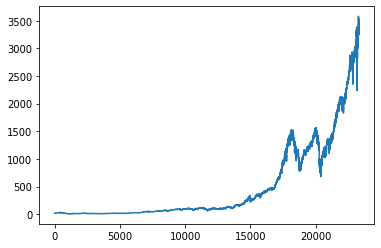

In [12]:
# Un solo argumento:
plt.plot(df_sp500['Close'])

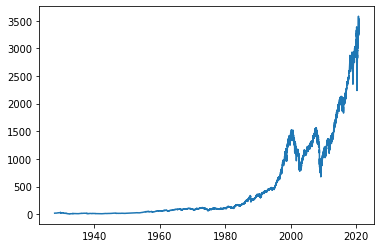

In [13]:
# Dos argumentos: x, y
plt.plot(df_sp500['Date'], df_sp500['Close'])

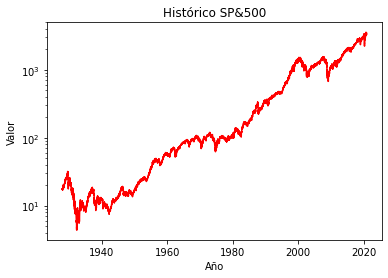

In [14]:
# Añadimos detalles
plt.plot(df_sp500['Date'], df_sp500['Close'], color='red')
plt.title('Histórico SP&500')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.yscale('log')
plt.show()

### 020101 EJEMPLO: Evolución Covid
Visualiza la evolución de casos acumulados de los países que contiene el dataframe.

Veamos varias visualizaciones útiles:

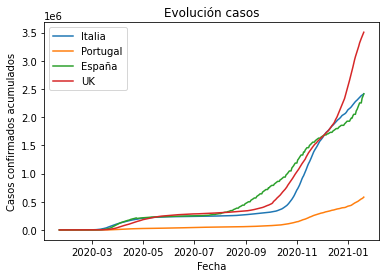

In [15]:
# Simplemente se añaden
plt.plot(df_covid['Date'], df_covid['Italy'], label='Italia')
plt.plot(df_covid['Date'], df_covid['Portugal'], label='Portugal')
plt.plot(df_covid['Date'], df_covid['Spain'], label='España')
plt.plot(df_covid['Date'], df_covid['UK'], label='UK')
plt.title('Evolución casos')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados acumulados')
plt.legend()
plt.show()

In [16]:
df_covid.columns

Index(['Date', 'France', 'Germany', 'Italy', 'Portugal', 'Spain', 'US', 'UK',
       'China', 'France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL',
       'Spain_REL', 'US_REL', 'UK_REL', 'China_REL', 'France_ult7',
       'Germany_ult7', 'Italy_ult7', 'Portugal_ult7', 'Spain_ult7', 'US_ult7',
       'UK_ult7', 'China_ult7', 'France_REL_ult7', 'Germany_REL_ult7',
       'Italy_REL_ult7', 'Portugal_REL_ult7', 'Spain_REL_ult7', 'US_REL_ult7',
       'UK_REL_ult7', 'China_REL_ult7'],
      dtype='object')

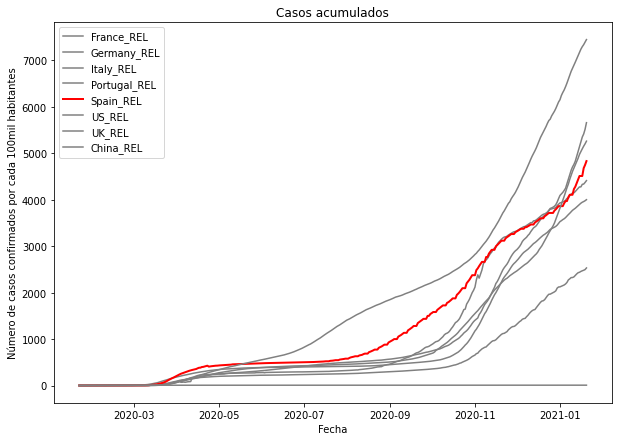

In [17]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

### 020102 EJERCICIO: Evolución Covid II
Muestra el número de casos en los últimos 7 días por cada 100.000 habitantes.

Muestra a China en azul, España en rojo y con anchura de 3, a US en negro, y el resto de países en gris.


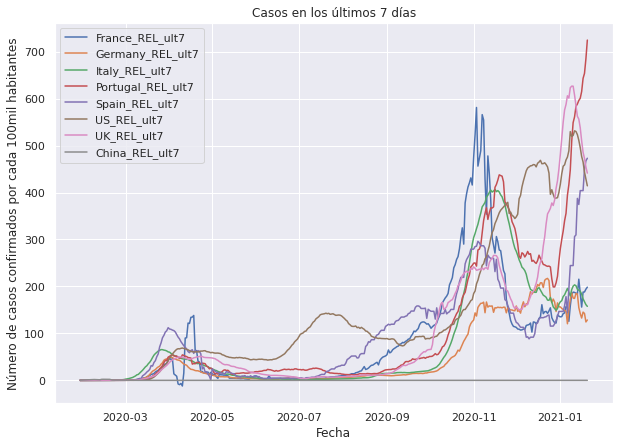

In [63]:
# Sin colores definidos
plt.figure(figsize=(10, 7))
for pais in ['France_REL_ult7', 'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7', 
             'Spain_REL_ult7', 'US_REL_ult7', 'UK_REL_ult7', 'China_REL_ult7']:
  plt.plot(df_covid['Date'], df_covid[pais], label=pais)
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

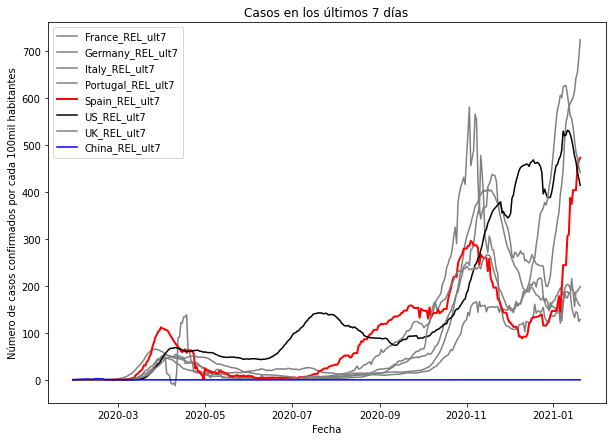

In [18]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL_ult7', 'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7', 
             'Spain_REL_ult7', 'US_REL_ult7', 'UK_REL_ult7', 'China_REL_ult7']:
  if pais == 'Spain_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], linewidth=2, label=pais, color='red')
  elif pais == 'China_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='blue')
  elif pais == 'US_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='black')
  else:
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

## 0202 plt.bar()
plt.[bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) es la función de Pyplot para visualizar barras.

plt.[barh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) hace lo mismo pero con barras horizontales.



In [19]:
cols = ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']

ult_fila = df_covid.index[-1]

valores = df_covid.loc[ult_fila, cols].values

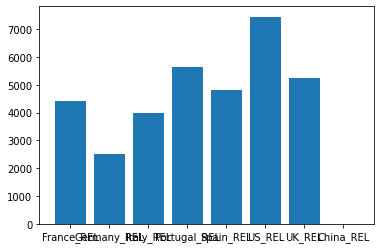

In [20]:
# Básico
plt.bar(x=cols, height=valores)
plt.show()

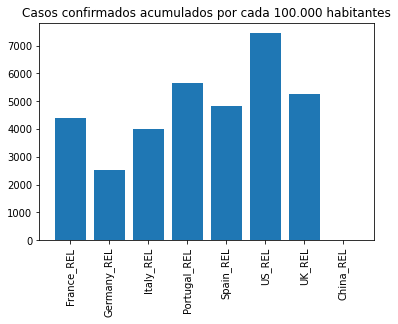

In [21]:
# Retoques
plt.bar(x=cols, height=valores)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.xticks(rotation=90)
plt.show()

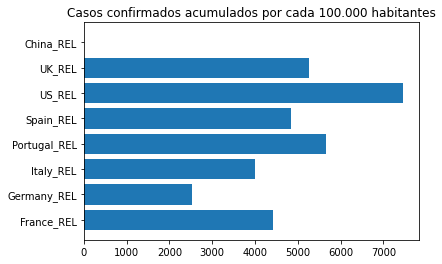

In [22]:
# En horizontal
plt.barh(y=cols, width=valores)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

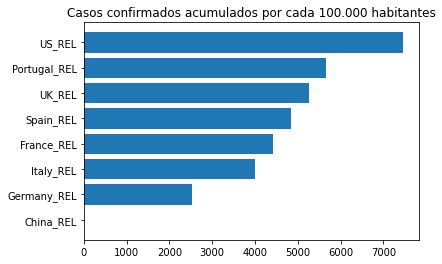

In [23]:
# Ordenado
serie_paises = pd.Series(data=valores, index=cols)
serie_paises = serie_paises.sort_values()

plt.barh(y=serie_paises.index, width=serie_paises.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

### 020201 EJEMPLO: Jugadores diestros/zurdos
Los gráficos de barras suelen ser una muy buena idea para mostrar la distribución de variables categóricas.

Volviendo a nuestro dataset del fifa 19. Vamos a mostrar en un gráfico de barras cuántos jugadores diestros y zurdos hay.

La función value_counts() será muy útil.

In [24]:
# Recordemos lo que devuelve la función value_counts() aplicada sobre una serie
df_fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

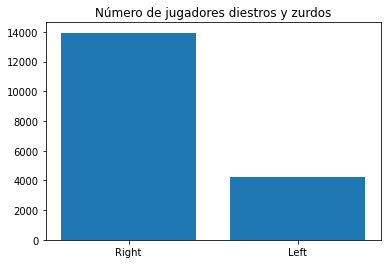

In [25]:
# Guardamos el resultado del value_counts(), que es un objeto serie
serie_pie_dominante = df_fifa19['Preferred Foot'].value_counts()

# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

#### Nota: Gráfico de tarta
Este es un buen ejemplo de un análisis en donde un gráfico de tarta no sería una mala opción. Las categorías zurdo/diestro son solo dos, son parte de un todo (jugadores totales) y es interesante saber cuál de las dos es mayoría.

En pyplot, el gráfico de tarta se realiza con plt.[pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html).

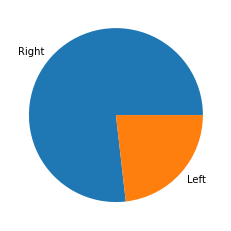

In [26]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

### 020202 EJERCICIO: Jugadores por nacionalidad
Muestra en un gráfico de barras horizontales el número de jugadores por nacionalidad de las 10 nacionalidades más representadas, ordenados de mayor a menor.

In [27]:
# Guardamos los 10 primeros resultados del value_counts()
serie_nacionalidad = df_fifa19['Nationality'].value_counts()[:10]
serie_nacionalidad

England        1657
Germany        1195
Spain          1071
Argentina       936
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

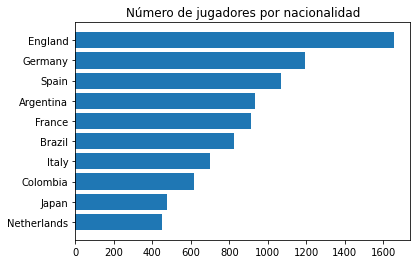

In [28]:
# Visualizamos el resultado
plt.barh(y=serie_nacionalidad.index[::-1], width=serie_nacionalidad.values[::-1])
plt.title('Número de jugadores por nacionalidad')
plt.show()

## 0203 plt.scatter()
Con plt.[scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) se realizan diagramas de dispersión (scatter plots).

In [29]:
df_fifa19.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96


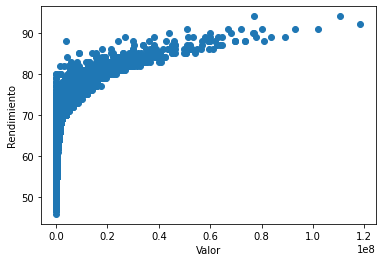

In [30]:
# Veamos la asociación entre valor y rendimiento
plt.scatter(df_fifa19['Value_€'],df_fifa19['Overall'])
plt.xlabel('Valor')
plt.ylabel('Rendimiento')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


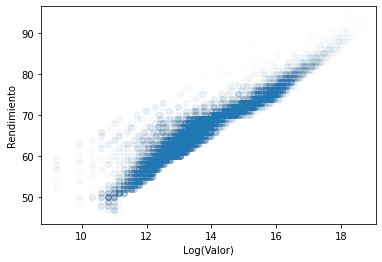

In [31]:
# alpha nos permite ver densidades
plt.scatter(np.log(df_fifa19['Value_€']), 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Log(Valor)')
plt.ylabel('Rendimiento')
plt.show()

El diagrama de dispersión de arriba muestra una clara asociación entre las variables valor y rendimiento. En este caso, parece claro que esto es porque el rendimiento influye directamente sobre el valor del jugador.

Pero hay otras razones por las que dos variables podrían estar correlacionadas sin que una cause a la otra. Hablaremos de esto en la próxima clase.

Volviendo a la asociación, esta es la pinta de dos variables que no tienen una gran asociación entre ellas:

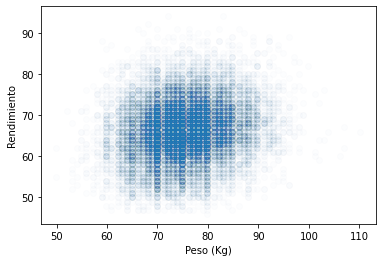

In [32]:
# el peso (entre atletas en su peso ideal) y el rendimiento no debería estar muy asociado
plt.scatter(df_fifa19['Weight_kg'], 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Peso (Kg)')
plt.ylabel('Rendimiento')
plt.show()

### 020301 EJERCICIO: Asociación edad/rendimiento
Muestra la asociación entre las variables edad (x) y rendimiento (y). Primero hazlo para todos los jugadores.

Luego, intenta un nuevo gráfico donde superpongas dos diagramas de dispersión: el primero, de nuevo, incluyendo todos los jugadores; el segundo, en naranja, se centrará en los jugadores españoles.

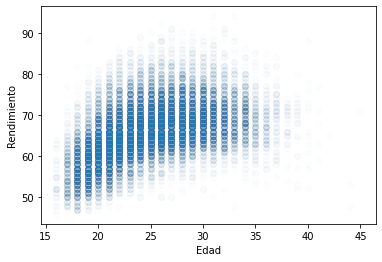

In [33]:
# Primero visualiza simplemente la asociación entre las dos variables
# diagrama de dispersión
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01)
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

In [34]:
# filtro jugadores españoles
filtro_españoles = df_fifa19['Nationality']=='Spain'

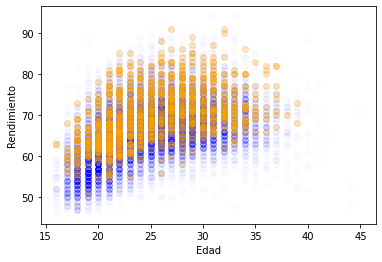

In [35]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

## 0204 plt.hist()
Los histogramas son una herramienta muy útil para visualizar la distribución de una variable continua.

En Pyplot, se utiliza plt.[hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

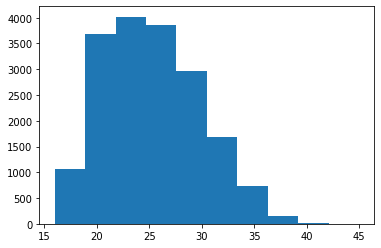

In [36]:
# distribución de la variable edad
plt.hist(df_fifa19['Age'])
plt.show()

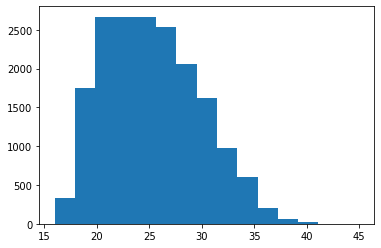

In [37]:
# 15 contenedores
plt.hist(df_fifa19['Age'], bins=15)
plt.show()

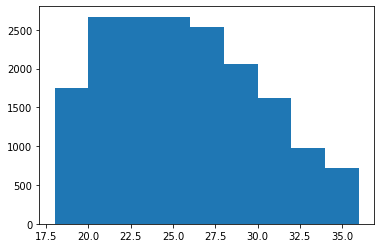

In [38]:
# contenedores personalizados
plt.hist(df_fifa19['Age'], bins=[18,20,22,24,26,28,30,32,34,36])
plt.show()

### 020301 EJERCICIO: Distribución de Overall
Muestra la distribución de la variable rendimiento (overall) usando 20 bins.

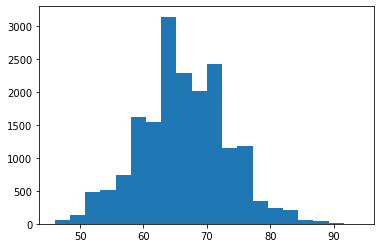

In [39]:
plt.hist(df_fifa19['Overall'], bins=20)
plt.show()

## 0205 Uso de fig y ax



# 03 Seaborn
[Seaborn](https://seaborn.pydata.org/) es una librería de Python de visualización basada en matplolib.

La utilizaremos para mejorar la estética de nuestros gráficos y para realizar ciertas mejoras sobre los gráficos básicos de matplolib.




In [40]:
# Se suele importar como sns
import seaborn as sns

## 0301 sns.set()
La función sns.[set()](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set) modifica la estética de los gráficos de matplotlib.pyplot a la estándar de seaborn.

In [41]:
sns.set()

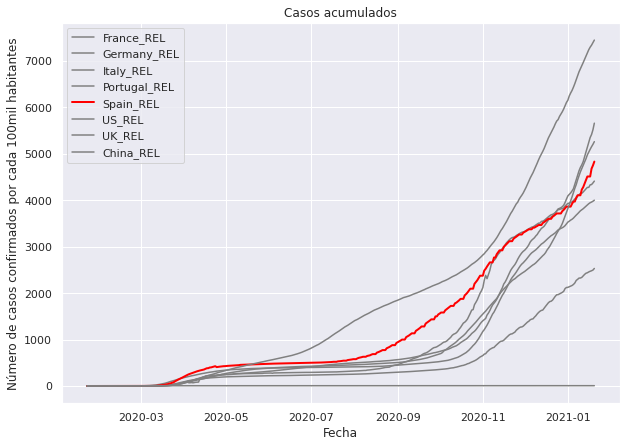

In [42]:
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

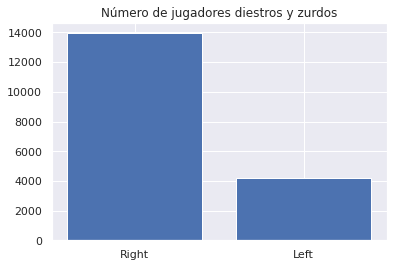

In [43]:
# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

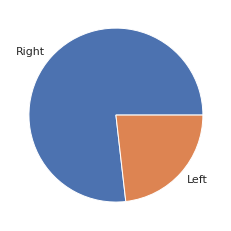

In [44]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

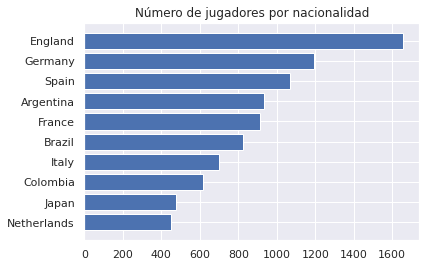

In [45]:
# Visualizamos el resultado
plt.barh(y=serie_nacionalidad.index[::-1], width=serie_nacionalidad.values[::-1])
plt.title('Número de jugadores por nacionalidad')
plt.show()

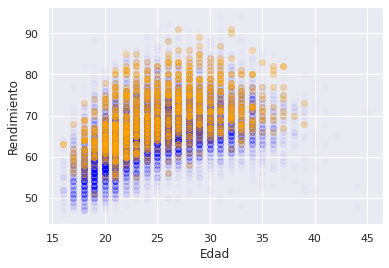

In [46]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

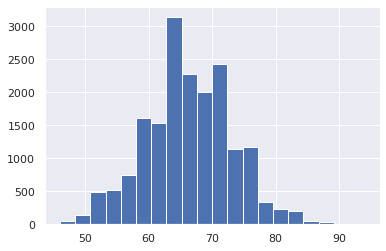

In [47]:
plt.hist(df_fifa19['Overall'], bins=20)
plt.show()

Se pueden definir muchos temas distintos utilizando [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme).

## 0302 Otras ventajas de seaborn
Además de sns.set(), seaborn puede ser útil:


*   para hacer matrices de correlación con pairplot
*   para usar algunas de sus gráficas más complejas



# 04 Pandas-Profiling
Pandas-Profiling 

## 0401 Instalar e importar
No es una librería tan habitual, por lo que no está incorporada en Colab. Primero tenemos que instalarla, y luego, sí, la importamos como hemos venido haciendo con otras:

In [48]:
# Instalamos pandas-profiling
! pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.10.0)


In [49]:
# Importamos solo la función ProfileReport (la verdaderamente importante)
from pandas_profiling import ProfileReport

## 0402 Se define el report
Definimos el informe que queremos genrar, simplemente pasándole a la función el dataframe y el título del informe.

In [54]:
profile_sp500 = ProfileReport(df_sp500, 
                               title='SP500', 
                               html={'style':{'full_width':False}})

In [64]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',  
        'Club', 'Preferred Foot'
        ]
len(df_fifa19)      

18159

In [65]:
profile_fifa19 = ProfileReport(df_fifa19.loc[:5000, cols], 
                               title='Informe Fifa 19', 
                               html={'style':{'full_width':False}})

## 0403 Generamos y guardamos
Generamos y guardamos los informes.

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
profile_sp500.to_file(output_file="/content/drive/My Drive/Data/SP500 Informe EDA.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
profile_fifa19.to_file(output_file="/content/drive/My Drive/Data/Fifa19 Informe EDA.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]